<a href="https://colab.research.google.com/github/MUmairAB/Movie-Review/blob/main/Preprocessing_of_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/MUmairAB/IMDB-Movies-Review-Dataset-for-Sentiment-Analysis.git

Cloning into 'IMDB-Movies-Review-Dataset-for-Sentiment-Analysis'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 53.84 MiB | 8.93 MiB/s, done.


In [3]:
train = pd.read_csv('/content/IMDB-Movies-Review-Dataset-for-Sentiment-Analysis/Train Data.csv')
test = pd.read_csv('/content/IMDB-Movies-Review-Dataset-for-Sentiment-Analysis/Test Data.csv')

In [4]:
train.shape, test.shape

((25000, 2), (25000, 2))

# Data Cleaning

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [7]:
# Checking for NULL values
print('NULL values in train dataset:',train.isnull().sum().sum())
print('NULL values in test dataset:',test.isnull().sum().sum())

NULL values in train dataset: 0
NULL values in test dataset: 0


In [8]:
# Let's reset the index
train.reset_index(drop=True,inplace=True)

In [9]:
# Let's check total unique values
train.nunique()

review       24904
sentiment        2
dtype: int64

In [10]:
test.nunique()

review       24801
sentiment        2
dtype: int64

In [11]:
# Duplicate rows
print('Totanl duplicate rows in train DataFrame:',train.duplicated().sum())
print('Totanl duplicate rows in test DataFrame:',test.duplicated().sum())

Totanl duplicate rows in train DataFrame: 96
Totanl duplicate rows in test DataFrame: 199


In [12]:
# Drop duplicate train data
train.drop_duplicates(inplace=True)
train.reset_index(drop=True,inplace=True)

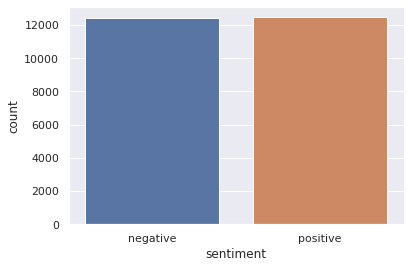

In [13]:
# Lets see distribution of sentiments
sns.countplot(data=train,x='sentiment');

# NLP
Since we have done the initial data cleaning, we can move on to further processing of the data.

This processing involves:
*   Removal of all links and special characters from the tweets
*   Tokenization and removal of stopwords
*   Lemmatization of the words of tweets

To do this, we'll use **Natural Language Toolkit (NLTK)**.


In [14]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.6 MB/s eta 0:00:00


In [15]:
# Importing NLTK and other standard libraries
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
#nltk.download('corpora')
import re
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import unidecode 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
#nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stopword=stopwords.words('english')
# Stop words don't carry much useful information in them.
# Thus, they will be removed from the reviews for further analysis 
#sw_extend = ()
#stopword.extend(sw_extend)

#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#lemmatizer = nltk.stem.WordNetLemmatizer()

def reviews_cleaner(rw):
    # lowercase the review words
    rw = str(rw).lower()
    
    # Removing punctuation and external links
    rw = re.sub('\[.*?\]', '', rw)
    rw = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", rw)
    rw = re.sub('https?://\S+|www\.\S+', '', rw)
    rw = re.sub('<.*?>+', '', rw)
    rw = re.sub('[%s]' % re.escape(string.punctuation), '', rw)
    rw = re.sub('\n', '', rw)
    rw = re.sub('\w*\d\w*', '', rw)
    rw = re.sub(r"\s{2,}", " ", rw)
    rw = re.sub(r"'", " ", rw)
    rw = re.sub(r":", " : ", rw)
    rw = re.sub(r"#", " ", rw)

    # Removing stop words
    rw = [word for word in rw.split(' ') if word not in stopword]
    rw=" ".join(rw)

    # Lemmatization of the words
    #tokenization = nltk.word_tokenize(twt)
    #for w in tokenization:
        #wordnet_lemmatizer.lemmatize(w)
    rw = [lemmatizer.lemmatize(word,'v') for word in rw.split(' ')]
    rw=" ".join(rw)    
    
    # Unicode text
    rw = unidecode.unidecode(rw)
    return rw

train["review"] = train["review"].apply(reviews_cleaner)


In [ ]:
test["review"] = test["review"].apply(reviews_cleaner)

# Word Cloud
It is nice to plot a word cloud to get the glimpse of the frequently used used in tweets.

For that, we'll use **wordcloud** library.

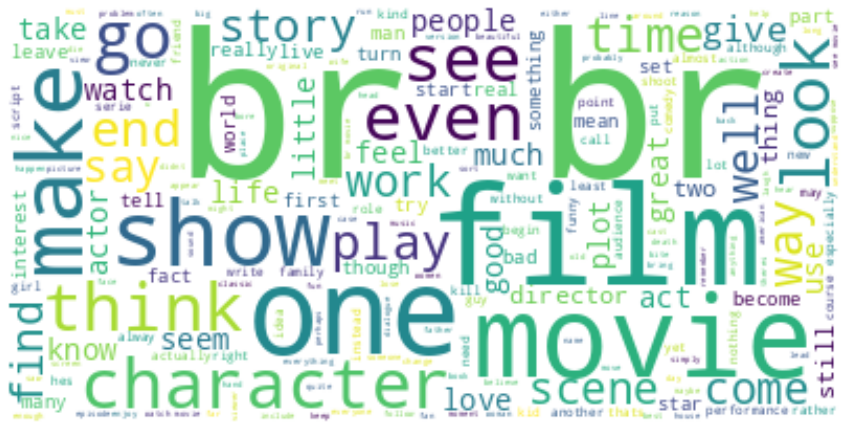

In [17]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in train['review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word cloud.png')

# Text Vectorization
Finally, we'll do the text vectorization. This is done to transform all the text tokens into numerical vectors.

To perform this operation, there are two ways:
* **CountVectorizer()** — the raw word counts often lead to features that put too much weight on words that appear very frequently. This might cause anomalies.
* **TF–IDF vectorizer()** — term frequency–inverse document frequency (TF–IDF), weights the word counts by a measure of how often they appear in the documents.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

If we use the default values of **TfidfVectorizer()** utility, our sparse matrix (output) will consider all words, even back slang or misspells. In order to avoid it, we'll fine tune it. 

We will not include words that occur over 75% times in our document corpus. 
We will also ignore the words that occur fewer than twice in our document corpus.

In [19]:
vec = TfidfVectorizer(max_df=0.75, min_df=2,smooth_idf=True)
X = vec.fit_transform(train['review'])

In [20]:
X

<24904x38415 sparse matrix of type '<class 'numpy.float64'>'
	with 2389500 stored elements in Compressed Sparse Row format>

In [21]:
# X is a sparse matrix. we can convert it to a DataFrame as follows
X_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
X_df

,aa,aaa,aaargh,aag,aage,aaker,aames,aamir,aan,aankhen,...,zuckers,zues,zulu,zuni,zuniga,zurich,zvonimir,zwick,zy,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24904 entries, 0 to 24903
Columns: 38415 entries, aa to zz
dtypes: float64(38415)
memory usage: 7.1 GB


In [20]:
X_df.shape

(24904, 38415)

In [26]:
y = [1 if s == 'positive' else 0 for s in train['sentiment']]

In [ ]:
y.info()()

In [ ]:
# splitting dataset for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df,y,
                                                    train_size=0.8,
                                                    random_state=4242)

# Building ANN

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

AttributeError: ignored

In [21]:
# Model defition
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

KeyboardInterrupt: ignored

In [ ]:
# Further splitting X_train & y_train for ANN model tuning
X_tr, y_tr, X_val, y_val = train_test_split(X_train,y_train,
                                            train_size=0.8,
                                            random_state=4242)

In [ ]:
history = model.fit(X_tr,y_tr,
                    epochs=40,
                    batch_size=500,
                    validation_data=(X_val,y_val)
                    )

In [ ]:
# The history object
history_dict = history.history

In [ ]:
# Plotting training and validation loss

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Plotting the training and validation accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()